# Function 2

## 학습목표
 1. 재귀함수 구현 및 사용 숙지
 2. Lambda 함수 이해 및 사용
 3. 모듈 임포트 후, 해당 모듈의 함수 사용법 

* binary search 구현

In [4]:
def binary_search(nums, x):
    s = 0
    e = len(nums) - 1
    
    while s <= e:
        mid = (s + e) / 2
        if nums[mid] == x:
            return mid
        elif nums[mid] > x:
            e = mid - 1
        else:
            s = mid + 1
            
    return -1

nums = [1, 2, 4, 5, 7, 8, 10, 22, 34, 56, 89, 100]
print binary_search(nums, 8)
print binary_search(nums, 1)
print binary_search(nums, 89)
print binary_search(nums, 88)
print binary_search(nums, 100)
print binary_search(nums, 101)

5
0
10
-1
11
-1


## Recursive Function

* 재귀함수
* 내부적으로 자기 자신을 호출함
* 점화식으로 표현되는 모든 수식을 간결히 표현할 수 있음
* 종료조건이 꼭! 필요함 (명시하지 않으면 무한 호출반복)
* 코드는 간결하나, 호출에 따른 오버헤드가 큼)


In [51]:
# factorial을 다시 작성해 봅시다.
def factorial(n):
    mul = 1
    for i in range(2, n+1):
        mul *= i
        
    return mul


# assert는 True가 전달되면 아무런 동작을 하지 않고, False가 전달되면 예외 발생
assert(factorial(5) == 120)
assert(factorial(4) == 24)
assert(factorial(1) == 1)

In [52]:
#recursive function을 사용하면...
def rf(n):
    if n == 0:
        return 1
    
    return n * rf(n-1)

assert(rf(5) == 120)
assert(rf(4) == 24)
assert(rf(1) == 1)

In [53]:
%timeit factorial(10000)

10 loops, best of 3: 20 ms per loop


In [54]:
import sys
sys.setrecursionlimit(200000)
%timeit rf(10000)

10 loops, best of 3: 23.8 ms per loop


In [55]:
def fibonacci(n):
    fibo = [1, 1]
    for i in range(2, n):
        fibo.append(fibo[i-1] + fibo[i-2])

    return fibo[-1]

print fibonacci(15)
%timeit fibonacci(20)

610
100000 loops, best of 3: 3.93 µs per loop


In [56]:
def recursive_fibonacci(n):
    if n == 1 or n == 2:
        return 1
    
    return recursive_fibonacci(n-1) + recursive_fibonacci(n-2)

print recursive_fibonacci(15)
%timeit recursive_fibonacci(20)

610
1000 loops, best of 3: 1.6 ms per loop


* memozation
 - Memoization effectively refers to remembering ("memoization" -> "memorandum" -> to be remembered) results of method calls based on the method inputs and then returning the remembered result rather than computing the result again. You can think of it as a cache for method results.
 - A simple example for computing factorials using memoization in Python would be something like this:


In [10]:
def factorial(n):
    if n < 2:
        return 1
    return n * factorial(n-1)

print factorial(5)
%timeit factorial(5)

#memozation을 이용하면
factorial_memo = {}
def factorial_cache(n):
    if n < 2 :
        return 1
    
    if n not in factorial_memo:
        factorial_memo[n] = n * factorial_cache(n-1)
    
    return factorial_memo[n]

print factorial_cache(5)
%timeit factorial_cache(5)

120
100000 loops, best of 3: 2.58 µs per loop
120
The slowest run took 7.52 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 496 ns per loop


In [4]:
fib_cache = {}
def recursive_fibonacci_memo(n):
    if n in fib_cache:
        return fib_cache[n]
    else:
        if n == 1 or n == 2:
            fib_cache[n] = 1
        else:
            fib_cache[n] =  recursive_fibonacci_memo(n-2) + recursive_fibonacci_memo(n-1)
            
        return fib_cache[n]

print recursive_fibonacci_memo(15)
%timeit recursive_fibonacci_memo(20)

610
The slowest run took 54.53 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 462 ns per loop


In [12]:
def fibonacci(n):
    if n <= 2:
        return 1
    
    return fibonacci(n-1) + fibonacci(n-2)

print fibonacci(10)
%timeit fibonacci(10)

fibonacci_cache = {}
def fibonacci_memo(n):
    if n <= 2:
        return 1
    
    if n not in fibonacci_cache:
        fibonacci_cache[n] = fibonacci_memo(n-1) + fibonacci_memo(n-2)
        
    return fibonacci_cache[n]
    
print fibonacci_memo(10)
%timeit fibonacci_memo(10)

55
10000 loops, best of 3: 34.9 µs per loop
55
The slowest run took 5.03 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 464 ns per loop


* recursive function 연습문제
 1. 숫자 리스트를 인자로 받아 그 숫자의 합을 구하는 재귀함수를 작성하시오.
 2. 숫자를 입력받아 각 자리수의 합을 구하는 재귀함수를 작성하시오.
 3. 주어진 두 수의 최대 공약수를 찾는 재귀함수를 작성하시오.
    A와 B의 최대 공약수는 B와 A%B의 최대 공약수와 같다.

In [122]:
# loop 이용
def list_sum(nums):
    s = 0
    for i in nums:
        s += i
        
    return s

# 기본 재귀
def lsr(nums, i):
    if i == len(nums):
        return 0
    return nums[i] + lsr(nums, i+1)

a = [1, 2, 4, 5, 6]
lsr(a, 0)

18

In [27]:
# fn = num[n] + fn-1을 이용한 경우
def recursive_sum(nums, k):
    if k == 0:
        return nums[k]
    
    return nums[k] + recursive_sum(nums, k-1)
    

a = [7, 2, 3, 4, 5]
print recursive_sum(a, len(a)-1)

21


In [123]:
def digit_sum(num, i):
    str_num = str(num)
    if i == len(str_num):
        return 0
    return int(str_num[i]) + digit_sum(num, i+1)

digit_sum(4543, 0)

16

In [6]:
def gcd(a, b):
    if b == 0:
        return a
    return gcd(b, a % b)

print gcd(50, 160)
print gcd(48, 36)
print gcd(36, 48)

10
12
12


# Lambda function

* Lambda 함수
 + 단일문으로 표현되는 익명함수
 + 익명함수란 이름이 없는 구현체만 존재하는 간단한 함수를 의미
 + 코드 상에서 한번만 사용되는 기능이 있을 때, 굳이 함수로 만들지 않고 일회성으로 만들어서 쓸 때 사용.

In [129]:
def square(x): 
    return x ** 2

square2 = lambda x : x**2

print square
print square2

print square(4), square2(4)

<function square at 0x10c2a51b8>
<function <lambda> at 0x10c2a5410>
16 16


In [1]:
#input 여러 개도 가능하다!
add3 = lambda x, y: x + y
print add3(20, 30)
add4 = lambda x, y: 2 * x + y
print add4(20,10)

50
50


In [2]:
nums = [(1, 2), (9, 5), (8, 4), (7, 6), (10, 2), (4, 5)]

def get_key(item):
    return item[1]

print sorted(nums) #key라는 parameter 사용 안했으므로 첫번째꺼 기준.
print sorted(nums, key = get_key) #여기서 한번 쓰려고 get_key(item) 함수 만들어주기는 너무 낭비야... 
print sorted(nums, key = lambda item : item[1]) #sorted 함수에 key라는 parameter가 있는데 key는 함수를 값으로 받음. 뭘 기준(key)으로 삼을지.
print sorted(nums, key = lambda item : item[1], reverse = True)  #reverse = True는 내림차순.

nums1 = [(1, 2, 4), (9, 5, 7), (8, 4, 1), (7, 6, 2), (10, 2, 4), (4, 7, 9), (4, 6, 9)] 
print sorted(nums1, key = lambda item : item[2]) #기준에서의 값이 겹친다고해서 왼쪽으로 이동해서 비교하지는 않는다.

nums2 = [(1,3), (3,2), (2,5), (1,2)]
print sorted(nums2, key = lambda item : item[1], reverse = True)

[(1, 2), (4, 5), (7, 6), (8, 4), (9, 5), (10, 2)]
[(1, 2), (10, 2), (8, 4), (9, 5), (4, 5), (7, 6)]
[(1, 2), (10, 2), (8, 4), (9, 5), (4, 5), (7, 6)]
[(7, 6), (9, 5), (4, 5), (8, 4), (1, 2), (10, 2)]
[(8, 4, 1), (7, 6, 2), (1, 2, 4), (10, 2, 4), (9, 5, 7), (4, 7, 9), (4, 6, 9)]
[(2, 5), (1, 3), (3, 2), (1, 2)]


* filter, map, reduce (얘들은 함수를 받는 놈들!)
 + lambda가 유용하게 사용되는 3가지 대표적 함수
 + 함수형 프로그래밍의 기본 요소이기도 함
 + filter : 특정 조건을 만족하는 요소만 남기고 필터링
 + map    : 각 원소를 주어진 수식에 따라 변형하여 새로운 리스트를 반환
 + reduce : 차례대로 앞 2개의 원소를 가지고 연산. 이 것을 마지막 원소까지 진행

In [175]:
nums = range(2, 100)

print filter(None, nums) #list comprehension에서 if 가 없는 것과 마찬가지.
print filter(lambda x: x % 2 == 0, nums) 

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


* filter를 이용하여 문자열의 길이가 5이하인 문자열만 필터링 하시오.
 - 그런데, 혹시 또 다른 방법이 생각나지 않나요?
 

In [4]:
a = ['apple', 'cat', 'banana', 'hat', 'orange', 'carrot', 'python']
print filter(lambda x : len(x) <= 5, a)
print [x for x in a if len(x) <= 5]


['apple', 'cat', 'hat']
['apple', 'cat', 'hat']


In [11]:
nums = range(2, 20)
print map(lambda x: x**2, nums)
print([x**2 for x in nums])

[4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]
[4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


* map을 이용하여 섭씨/화씨 변환을 다시 해보죠.
 - 그런데, 혹시 또 다른 방법이 생각나진 않나요?
 


In [10]:
c = [39, 37, 36.5, 33.2, 30]
# f = 1.8 * c + 32

print map(lambda x: 1.8 * x + 32, c)
print [1.8 * x + 32 for x in c]

[102.2, 98.60000000000001, 97.7, 91.76, 86.0]
[102.2, 98.60000000000001, 97.7, 91.76, 86.0]


In [16]:
a = [1,2,3,4]
b = [17,12,11,10]
c = [-1,-4,5,9]


print(map(lambda x, y, z : x + (y *z), a, b, c))
print map(lambda x, y, z : x + y + z, a, b, c)

[-16, -46, 58, 94]
[17, 10, 19, 23]


* reduce 이용하여 원소의 합 구하기

In [18]:
nums = [1, 2, 9, 8, 5, 4, 7, 10, 3]
print reduce(lambda x, y: x + y, nums)

num_list=[1,2,3,4,5,6]
print(reduce(lambda x, y: x*y, num_list))


49
720


* reduce로 리스트의 최대값을 구해봅시다.


In [137]:
print reduce(lambda x, y : x if x > y else y, nums)

10


# 이거 다시 풀어보자. 여전히 이해 안됨.
http://book.pythontips.com/en/latest/map_filter.html

* 연습문제
 1. filter를 직접 구현해봅시다. filter2(func, iterable):
 2. map을 직접 구현해봅시다. map2(func, iterable):


In [8]:
def filter2(func, iterable):
    result = []
    for i in iterable:
        if func(i): # == True 로 놓으면 안되.
            result.append(i) # func(i) 넣으면 True로 들어가. result += i 는 안되나?
            
    return result

nums = range(10)
print filter(lambda x : x % 2 == 1, nums)
print filter2(lambda x : x % 2 == 1, nums)

[1, 3, 5, 7, 9]
[1, 3, 5, 7, 9]


In [10]:
def map2(func, iterable):
    result = []
    for i in iterable:
        result.append(func(i))
    return result

a = range(1,11)
print(map(lambda x: x * 2, a))
print(map2(lambda x: x * 2, a))

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


* 에러 처리 하기 try, except
 + 예외 상황 발생 시, 적절한 대처를 위해 필요함
 + 함수 작성시, 발생할 수 있는 에러에 대해 처리하는 것이 좋은 습관임


In [38]:

nums = [1, 2, 3]
pos = 5
print nums[pos]
print nums[0]

IndexError: list index out of range

In [48]:
nums = [1, 2, 3]
pos = 4

try:
    print nums[pos]
    
except: #try의 어느 한 줄에서 문제가 생기면 바로 except로 뛴다.
    print 'need a index between 0 and len(nums)-1', 'but got', pos
    
print nums[0]

need a index between 0 and len(nums)-1 but got 4
1


* finally 
 + 예외 발생 여부에 관계 없이 항상 실행해야할 코드

In [15]:
nums = [1, 2, 3]
pos = 4

try:
    print nums[pos]
except:
    print 'need a index between 0 and len(nums)-1', 'but got', pos
finally:
    print 'task done'
    
print nums[0]

need a index between 0 and len(nums)-1 but got 4
task done
1


* 예외 처리 세분화 
 + Exception으로 보편적으로 다 처리할 수 있다
 + 세분화하여 처리하면, 각 예외 상황에 따라 다른 처리를 할 수 있다.
 + 특정한 에러를 지정할 수 있음. 

In [17]:
nums = [0, 1, 2, 3]
pos1 = 5 #2
pos2 = 0

try:
    print nums[pos1] / nums[pos2] #pos1=5, 인덱스를 구할 때 잘못되었음. 
except IndexError as err:
    print 'need a index between 0 and len(nums)-1', 'but got', pos
except Exception as other: #ZeroDivisionError. 분모에 0이 들어갈 수 없음. 
    print 'something else broke', other
finally:
    print 'task done'
    
#print nums[0]

#크롤링할 때 많이 쓰겠지?!
#except에 continue 적용하면 1000개 중 3번째에서 에러떠도 일단 나머지 다 긁어올 수 있으니까.

need a index between 0 and len(nums)-1 but got 4
task done


* 모듈 임포트
(모듈이란 이미 구현되어 있는 식.우리는 모듈을 가져와서, 즉 이미 다른 사람이 짜놓은 식을 우리가 import해서 사용한다.)
 + numpy - pip install numpy (수치해석 라이브러리)
 + scipy - pip install scipy (windows - https://sourceforge.net/projects/scipy/files/scipy/0.16.1/scipy-0.16.1-win32-superpack-python2.7.exe/download 
 http://aka.ms/vcpython27)
 + pandas - pip install pandas
 + sklearn  - pip install scikit-learn
 + matplotlib pip install matplotlib
 + statsmodels - pip install statsmodels
 + seaborn - pip install seaborn

* import / from import

In [92]:
import numpy # 모듈 임포트.

print numpy.random.randint(100) #모듈 안에는 또 서브모듈, 함수, 클래스 등이 있다.

99


In [71]:
import numpy as np # 모듈 임포트 후 alias(별명) 붙임. numpy를 np로 줄여서 부르자 귀찮으니까.

print np.random.randint(100)
np.random.rand()

47


0.2479483505396527

In [11]:
from numpy import random # numpy 모듈에서 하위 모듈인 random만을 import할게!

print random.randint(100)

10


In [72]:
import numpy.random as random # numpy의 하위모듈인 random만을 import 후, alias 붙임. 이 방법도 나쁘지 않네~

print random.randint(100) #tab을 이용하면 어떤 모듈안에 어떤 서브모듈이 있는지 볼 수 있음. random.+tab

11


 * 연습문제
  1. 다트를 던져서 파이(3.141592..)를 계산하는 동작을 시뮬레이션 하는 함수를 만들어 보세요

In [89]:
def pi(times):
    count = 0
    for i in range(1,times):
        x = numpy.random.rand()
        y = numpy.random.rand()
        
        if x**2 + y**2 <=1:
            count += 1
            
    return float(count)/times * 4

print(pi(1000000))

3.13898


* matplotlib 모듈
 - 시각화 담당 모듈
 - 2차원, 3차원 그래프(선, 막대, 파이차트 등등)

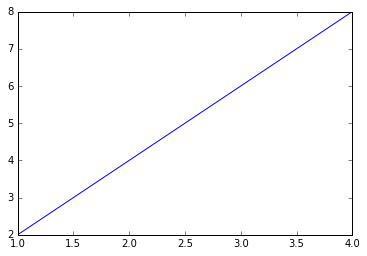

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

plt.plot(x, y)
plt.show()

* request module
 - http를 통한 web resource에 접근할 때 사용

In [90]:
import requests
response = requests.get('http://www.naver.com')
print response.text


<!doctype html>
<html lang="ko">
<head>
<meta charset="utf-8">
<meta http-equiv="Content-Script-Type" content="text/javascript">
<meta http-equiv="Content-Style-Type" content="text/css">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=960">
<meta name="apple-mobile-web-app-title" content="NAVER" />
<meta property="og:title" content="네이버 메인">
<meta property="og:url" content="http://www.naver.com/">
<meta property="og:image" content="http://static.naver.net/www/mobile/edit/2016/0705/mobile_212852414260.png">
<meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요">
<meta name="twitter:card" content="summary">
<meta name="twitter:title" content="네이버 메인">
<meta name="twitter:url" content="http://www.naver.com/">
<meta name="twitter:image" content="http://static.naver.net/www/mobile/edit/2016/0705/mobile_212852414260.png">
<meta name="twitter:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요">
<link rel="shortcut icon" type="

* collections module
 - https://docs.python.org/2/library/collections.html#collections.OrderedDict

* Counter 
  - counting을 목적으로 하는 객체
* defaultdict
  - 기본값을 갖는 dictionary
* OrderedDict
  - 순서를 갖는 dictionary (key가 삽입된 순서)

In [22]:
from collections import Counter

a = [1, 1, 2, 1, 2, 3, 3, 2, 4, 5, 5, 1]
b = Counter(a)
print dir(b)

b.most_common() #Return a list of the n most common elements and their counts from the most common to the least. 
                #If n is omitted or None, most_common() returns all elements in the counter.
print b
print b[1] #[] 속 1은 인덱스의 1이 아니라 dictionary key 중 1이다.

['__add__', '__and__', '__class__', '__cmp__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__missing__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', 'clear', 'copy', 'elements', 'fromkeys', 'get', 'has_key', 'items', 'iteritems', 'iterkeys', 'itervalues', 'keys', 'most_common', 'pop', 'popitem', 'setdefault', 'subtract', 'update', 'values', 'viewitems', 'viewkeys', 'viewvalues']
Counter({1: 4, 2: 3, 3: 2, 5: 2, 4: 1})
4


In [94]:
from collections import defaultdict #처음 나온 숫자는 dict에 key가 존재하지 않으니까 dict이 죽어.
#dict죽는걸 방지하기 위해 defaultdict사용. default값으로 0이 들어와있음. 

a = [1, 1, 2, 1, 2, 3, 3, 2, 4, 5, 5, 1]
num_dict = defaultdict(int)
for i in a:
        num_dict[i] += 1
        
print num_dict

defaultdict(<type 'int'>, {1: 4, 2: 3, 3: 2, 4: 1, 5: 2})


In [20]:
from collections import OrderedDict #내가 넣은 순서대로 key가 순서를 맞춘다. 

dict1 = OrderedDict()
dict1['a'] = 1
dict1['c'] = 2
dict1['b'] = 100

print dict1

OrderedDict([('a', 1), ('c', 2), ('b', 100)])


* 과제 
 1. reduce를 직접 구현하세요 reduce2(func, iterable)
 2. 이진탐색을 재귀함수로 구현해보세요. input space가 줄고, 줄고,...

In [13]:
#1. filter, map은 list를 받아 list를 반환시키는 반면 얘는 값 하나를 반환.
nums = [1, 3, 2, 9, 5, 7]
def reduce2(func, iterable):
    acc_val = iterable[0]
    for i in iterable[1:]:
        acc_val = func(acc_val, i)
    
    return acc_val

print reduce(lambda x, y: x + y, nums)
print reduce2(lambda x, y: x + y, nums)

print reduce(lambda x, y: x if x > y else y, nums)
print reduce2(lambda x, y: x if x > y else y, nums)

27
27
9
9


In [30]:
lst = [1,2,8,6,7,4,5,9,10,23,5,4,65,34,22]
lst.sort()

def binary(iterable, num, start, end):
    mid = (start+end)/2
    
    if len(iterable)>=1:
        if num > iterable[mid]:
            return binary(lst, num, mid, end)

        elif num < iterable[mid]:
            return binary(lst, num, start, mid)

        elif num == iterable[mid]:
            return mid
        
start = 0
end = len(lst)-1
print binary(lst, 10, start, end)
print binary(lst, 23, start, end)
print binary(lst, 1, start, end)
print binary(lst, 2, start, end)
print binary(lst, 4, start, end)
print binary(lst, 7, start, end)
print binary(lst, 9, start, end)


10
12
0
1
3
7
9
